**Time Reversal Effect**

1. Import libraries:

In [1]:
import quantumaudio
from quantumaudio.tools import test_signal
from quantumaudio.tools import plot
import math

2. Generate signal and encode it:

Encoding scheme:
Quantum State Modulation

Encoded Circuit:


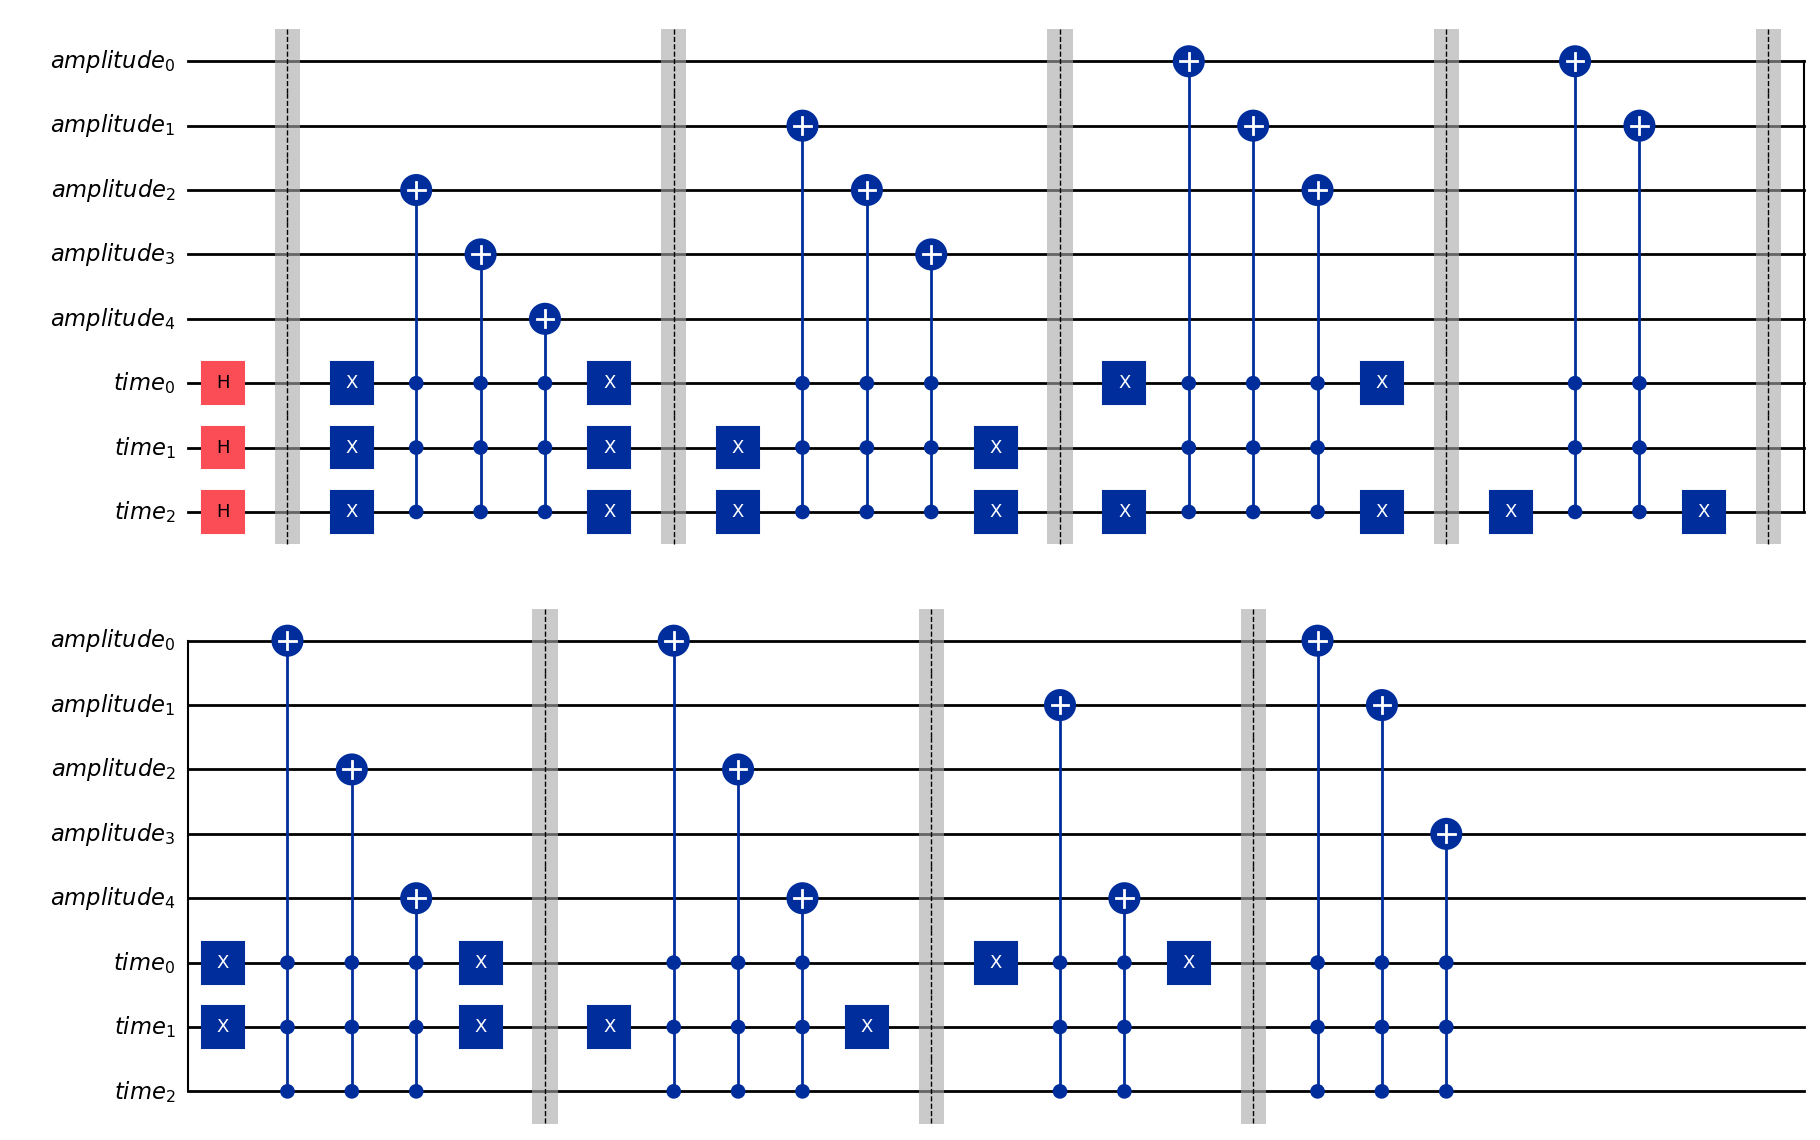

In [2]:
num_samples = 8  # change this to any power of 2 (e.g., 2, 4, 8, 16, ...). These are the time samples
m = int(math.log2(num_samples))  # calculate the number of time qubits required
qubit_depth = 5  # number of amplitude qubits in the circuit
signal = test_signal(num_channels=1, num_samples=num_samples)  # import test signal. 4 samples require 2 qubits for the time
print("Encoding scheme:")
scheme = quantumaudio.load_scheme('qsm', qubit_depth=qubit_depth)  # load the QSM scheme. qubit_depth is the number of amplitude qubits
encoded_circuit = scheme.encode(signal, verbose=0, measure=False)
print("\nEncoded Circuit:")
encoded_circuit.draw(output='mpl')

2. Time Reversal Effect:


Encoded Circuit with Time Reversal:


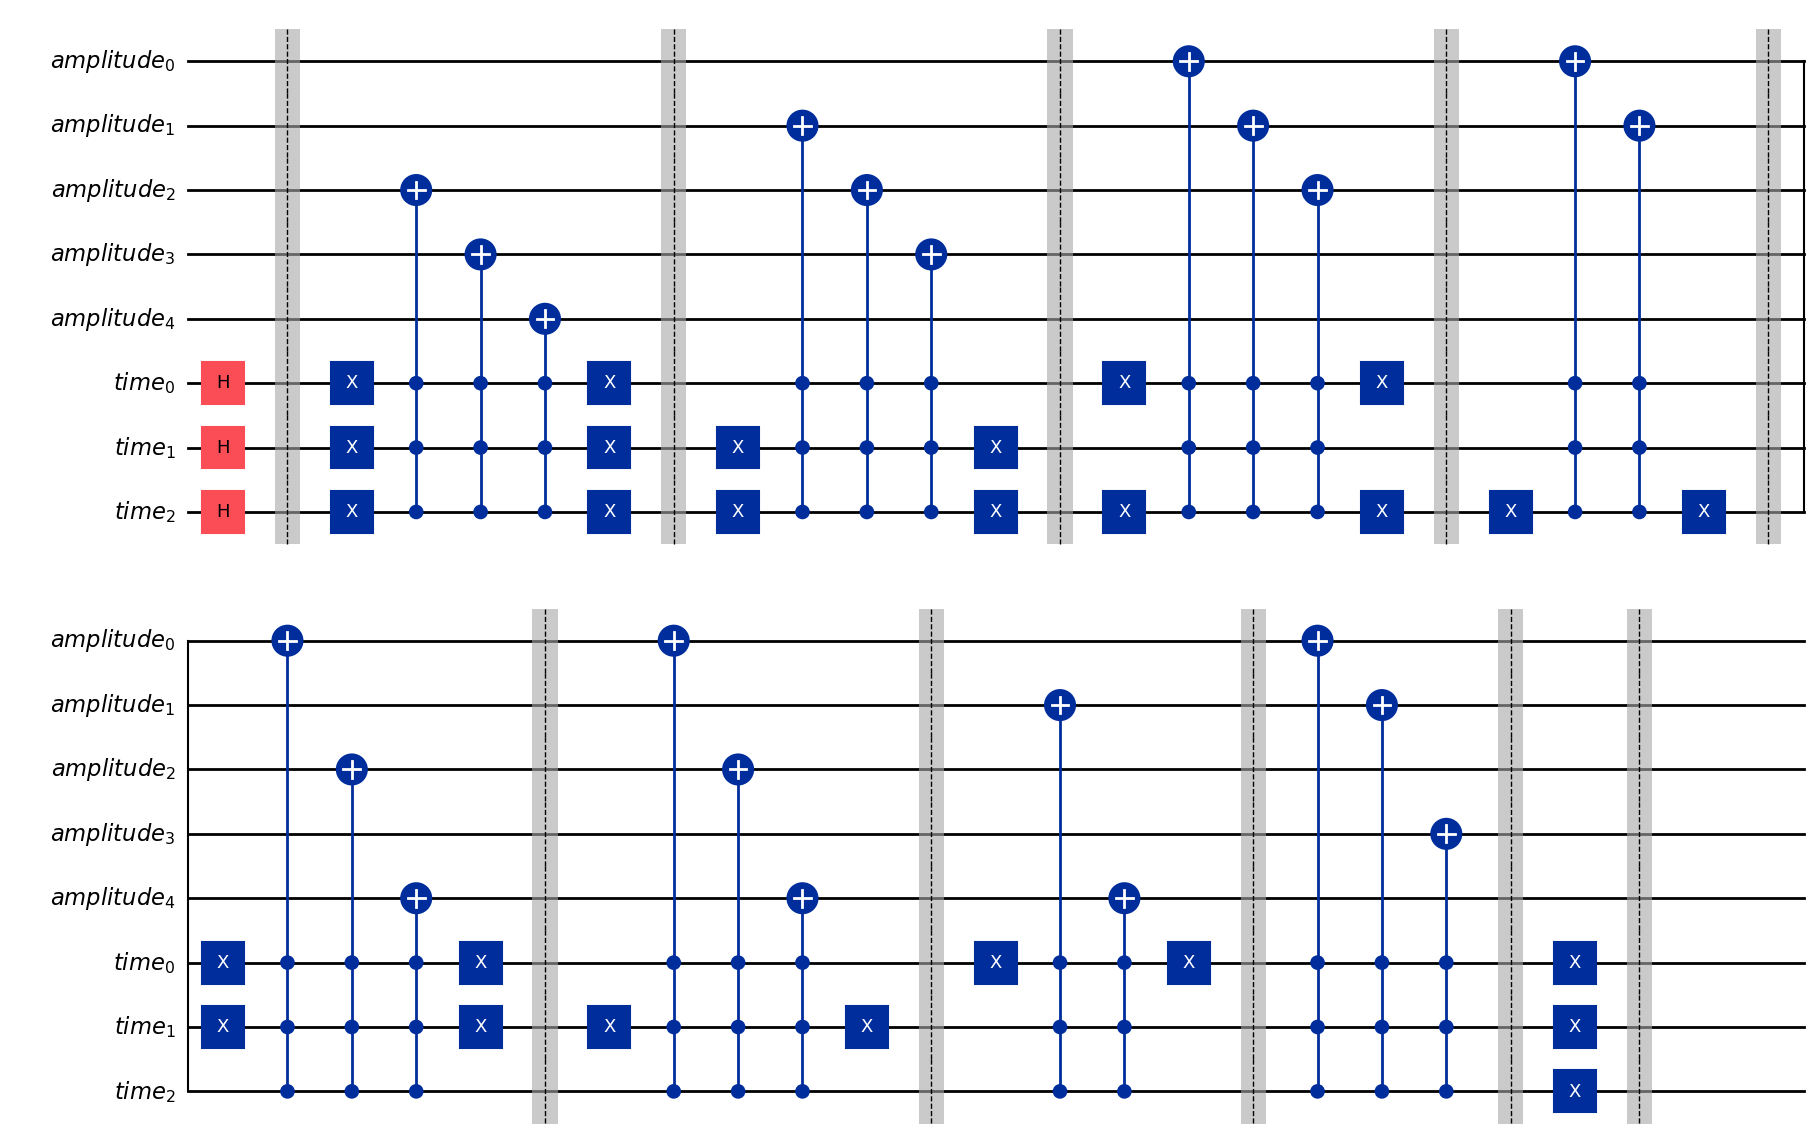

In [3]:
# --- APPLY X GATES ---
# Add barrier
encoded_circuit.barrier()

# Apply X gates to the time qubits to reverse the order of the time qubits
for i in range(m):
    encoded_circuit.x(-1 - i)  # Apply X gates to the last m qubits

# Add barrier
encoded_circuit.barrier()

print("\nEncoded Circuit with Time Reversal:")
encoded_circuit.draw(output='mpl')

4. Decoded signal and plot comparison:


Original Signal:
[-0.25091976  0.90142861  0.46398788  0.19731697 -0.68796272 -0.68801096
 -0.88383278  0.73235229]

Decoded Signal:
[ 0.6875 -0.875  -0.6875 -0.6875  0.1875  0.4375  0.875  -0.25  ]

Plot:


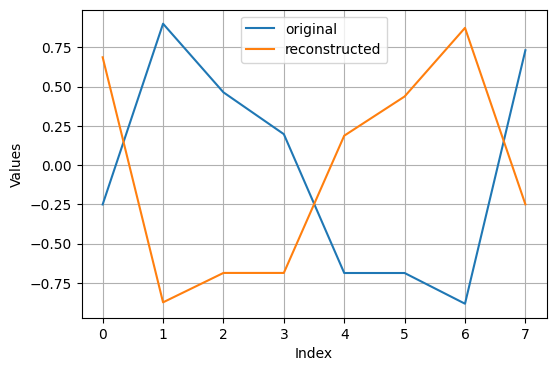

In [4]:
decoded_signal = scheme.decode(encoded_circuit)

print("\nOriginal Signal:")
print(signal)
print("\nDecoded Signal:")
print(decoded_signal)
print("\nPlot:")
plot([signal, decoded_signal])